**Dataset:** This lab will use a dataset that represents water flow out of a dame versus change of water level. The dataset can be downloaded from:https://drive.google.com/file/d/1VOUAxkaAf95SaJa3K6tBY9N%20--_gRQIdWT/view?%20sharing

**Step-1: Import Libraries:** The first step in any project is to import the libraries we are going to use

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import linear_model
#set default figure size
mpl.rcParams['figure.figsize'] = (12, 8)

**Step-2: Load the Data:** The next step is to load the data. While loading the data, let's also insert a column of ones to be the first column in the feature set. This column represents $X_0=1$, which will be multiplied by $\theta_0$.

In [ ]:
data = pd.read_csv('Lab2_dataset.csv')
data_train = data.loc[0:11,['X', 'y']]
data_test = data.loc[0:20,['Xtest', 'ytest']]
data_val = data.loc[0:20,['Xval', 'yval']]

# Include a column of 1s in X to represent X_0 that will be multiplied by theta_0
X_train = np.c_[np.ones_like(data_train['X']), data_train['X']]
y_train = np.c_[data_train['y']]

X_val = np.c_[np.ones_like(data_val['Xval']), data_val['Xval']]
y_val = np.c_[data_val['yval']]

X_test = np.c_[np.ones_like(data_test['Xtest']), data_test['Xtest']]
y_test = np.c_[data_test['ytest']]

*Explore the data:* Let's look at the data:

In [ ]:
print('X_train:')
print(X_train)
print('y_train:')
print(y_train)

X_train:
[[  1.     -15.9368]
 [  1.     -29.153 ]
 [  1.      36.1895]
 [  1.      37.4922]
 [  1.     -48.0588]
 [  1.      -8.9415]
 [  1.      15.3078]
 [  1.     -34.7063]
 [  1.       1.3892]
 [  1.     -44.3838]
 [  1.       7.0135]
 [  1.      22.7627]]
y_train:
[[ 2.1343]
 [ 1.1733]
 [34.3591]
 [36.838 ]
 [ 2.809 ]
 [ 2.1211]
 [14.7103]
 [ 2.6142]
 [ 3.7402]
 [ 3.7317]
 [ 7.6277]
 [22.7524]]


*Plot the data:* It is often useful to create a scatter plot of your data. Sometimes this helps identify the best polynomial order that fits your data. For that, we will create a function that we can use to plot our data. Here, we will create a general plot function that we can use to plot the data and later when we find the optimal model, we can also use the function to plot the optimal model on the same Figure with that data. The if condition in this function is intended to help us later when we try to plot the developed linear regression model on the scatter plot of the training data. Note here: once we know our model  $\theta_0 + \theta_1 X_1$, we will substitute by a rane of $X$  to find our line and plot it on the data.

In [ ]:
def plotData(X, y, theta = np.array(([0],[0])), reg = 0):
    plt.figure(figsize=(12, 8))
    plt.scatter(X[:, 1], y, s = 50, c = 'red', marker = 'x', linewidths = 1, label = 'Data')
    plt.grid(True)
    plt.title('Water Flow Data')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    if theta.any() != 0:
        plt.plot(np.linspace(X.min(), X.max()), theta[0] + theta[1] * np.linspace(X.min(), X.max()),
                                                 label = 'Optimized linear fit')
        plt.title('Water Data: Linear Fit')

    plt.legend()

Now, let's use the plot function:

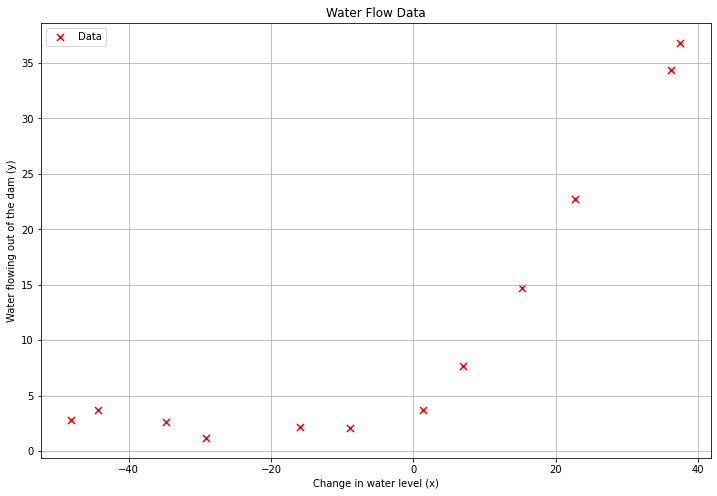

In [ ]:
plotData(X_train, y_train)

**Step-3: Implement a Linear Regression Model:**

*Step-3.1: Cost Function and Gradient:* Let's implement a function to calculate the cost $J$. This will be useful later in most of our next steps. This function will return the cost value. This is a general implementation that works even for regularized functions.

In [ ]:
def cost(theta, X, y, reg = 0):
    m = y.size
    f = np.dot(X,theta).reshape((m, 1))
    J1 = (1 / (2 * m)) * np.sum(np.square(f - y))
    J2 = (reg / (2 * m)) * theta[1:].T.dot(theta[1:])
    J = J1 + J2
    grad = ((1 / m)*(X.T.dot(f - y)) + (reg / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]).ravel()
    return J, grad

*Step-3.2: Gradient Descent Algorithm:* Next, we implement the iterations of the gradient descent.  

In [ ]:
def gradient_descent(alpha, x, y, numIterations):
    m = y.size
    theta = np.ones(2)
    count = 0
    prevJ = 0
    diffJ = 0.01
    Js = []
    Counts = []
    while (abs(diffJ) >= 0.01) and (count < numIterations):
          J, grad = cost(theta, x, y, reg = 0)
          diffJ = J - prevJ
          print(count, J, abs(diffJ))
          theta = theta - alpha * grad  # update
          prevJ = J
          Js.append(J)
          Counts.append(count)
          count = count + 1
    plt.plot(Counts, Js)
    plt.title("MSE vs. Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("MSE")
    plt.show()
    print("MSE: ", J)
    return theta

Let's use the gradient descent function to get $\theta$:

0 303.95212832416655 303.95212832416655
1 97.83089178216704 206.1212365419995
2 92.99331842560191 4.83757335656513
3 92.7493951937704 0.24392323183151632
4 92.61056007053415 0.13883512323624814
5 92.47438139171504 0.13617867881910684
6 92.33852111647849 0.13586027523655275
7 92.20292539000083 0.1355957264776606
8 92.06759248465946 0.13533290534137166
9 91.93252186336616 0.13507062129329483
10 91.7977130171658 0.13480884620035738
11 91.6631654387079 0.134547578457898
12 91.5288786216394 0.13428681706851364
13 91.39485206058879 0.13402656105060373
14 91.26108525116412 0.1337668094246709
15 91.12757768995093 0.13350756121319307
16 90.99432887451044 0.1332488154404814
17 90.8613383033776 0.13299057113285073
18 90.72860547605922 0.1327328273183781
19 90.5961298930321 0.13247558302711582
20 90.46391105574122 0.13221883729087835
21 90.33194846659768 0.13196258914354075
22 90.20024162897698 0.13170683762069757
23 90.06879004721716 0.1314515817598192
24 89.9375932266168 0.13119682060036553
25 8

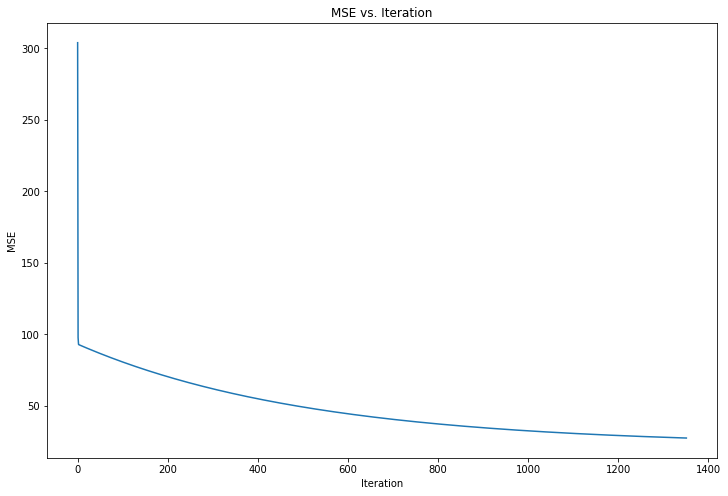

MSE:  27.52272241801232
alpha = 0.001


In [ ]:
alpha = 0.001 # learning rate
theta = gradient_descent(alpha, X_train, y_train, 10000)
print("alpha = 0.001")

Here the step size allows us to get to the desired J value, indicating the minimal square error of the data. Of the three alpha sizes attempted, this one is the best as it reaches the smallest value of J

0 303.95212832416655 303.95212832416655
1 1483678.591102604 1483374.6389742799
2 10441755606.062258 10440271927.471155
3 73490408080396.95 73479966324790.89
4 5.1723487117430534e+17 5.1716138076622496e+17
5 3.640365034662035e+21 3.639847799790861e+21
6 2.562135371016774e+25 2.561771334513308e+25
7 1.8032635729962463e+29 1.8030073594591447e+29
8 1.269159916560044e+33 1.2689795902027444e+33
9 8.932509467411347e+36 8.931240307494787e+36
10 6.286814162998229e+40 6.285920912051488e+40
11 4.4247400424563134e+44 4.424111361040013e+44
12 3.1141885119726924e+48 3.1137460379684466e+48
13 2.1918056190977795e+52 2.1914942002465823e+52
14 1.5426207673168392e+56 1.5424015867549293e+56
15 1.0857161835075267e+60 1.085561921430795e+60
16 7.641409062451963e+63 7.640323346268456e+63
17 5.3781212205093896e+67 5.377357079603144e+67
18 3.785190352473064e+71 3.784652540351013e+71
19 2.6640652780039266e+75 2.6636867589686793e+75
20 1.875003142399203e+79 1.8747367358714025e+79
21 1.3196511410715154e+83 1.31946

<ipython-input-10-84d1330b09d0>:4: RuntimeWarning: overflow encountered in square
  J1 = (1 / (2 * m)) * np.sum(np.square(f - y))
<ipython-input-10-84d1330b09d0>:5: RuntimeWarning: invalid value encountered in double_scalars
  J2 = (reg / (2 * m)) * theta[1:].T.dot(theta[1:])


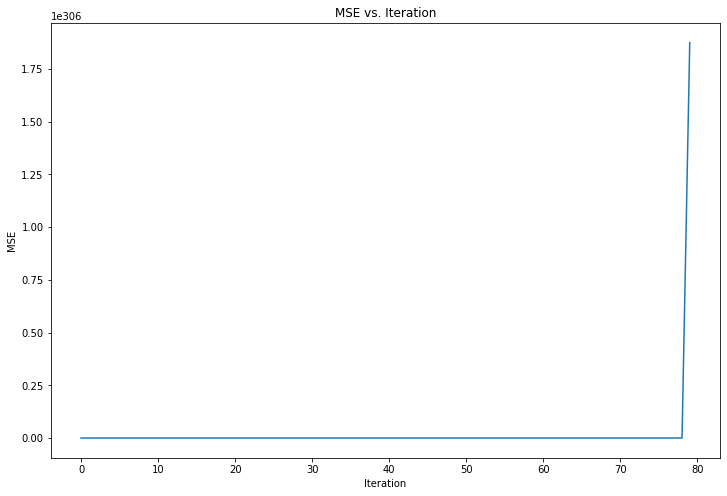

MSE:  nan
alpha = 0.1


In [ ]:
alpha = 0.1
theta = gradient_descent(alpha, X_train, y_train, 10000)
print("alpha = 0.1")

Here the MSE ends up overflowing, indicating overfitting. The learning rate is too large to implement into gradient descent, meaning the algorithm will never reach the optimal J value.

0 303.95212832416655 303.95212832416655
1 269.66739773698055 34.284730587186004
2 240.9544563171316 28.71294141984896
3 216.90744198875598 24.04701432837561
4 196.767767898869 20.139674089886967
5 179.90017838453244 16.867589514336572
6 165.77269776528556 14.127480619246882
7 153.93983906459064 11.832858700694914
8 144.02854266043693 9.911296404153717
9 135.72640103271542 8.302141627721511
10 128.77179793333246 6.95460309938295
11 122.94565073186055 5.826147201471912
12 118.06449529215226 4.881155439708294
13 113.9746951109868 4.089800181165458
14 110.54759193602092 3.427103174965879
15 107.67544479716554 2.8721471388553823
16 105.26802927098825 2.4074155261772887
17 103.24978963733511 2.0182396336531383
18 101.55745403885263 1.6923355984824866
19 100.13803736831372 1.419416670538908
20 98.94716884688941 1.1908685214243064
21 97.94769150505306 0.9994773418363536
22 97.10848936013656 0.8392021449164986
23 96.40350527157558 0.7049840885609768
24 95.81091847342964 0.5925867981459447
25 95

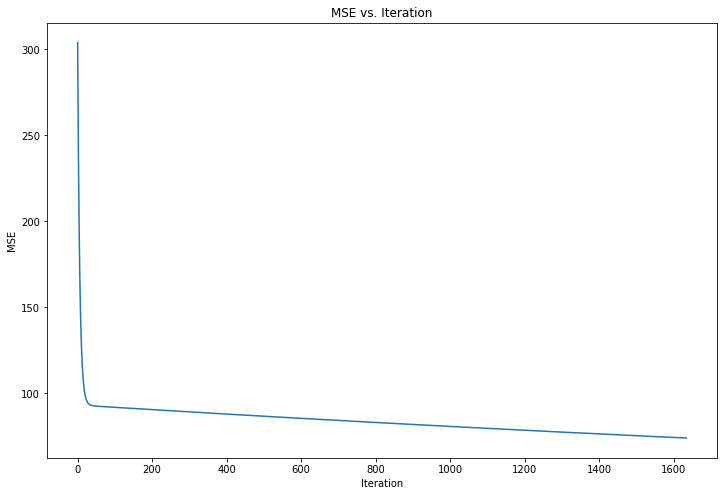

MSE:  73.93570831956377
alpha = 0.001


In [ ]:
alpha = 0.0001
theta = gradient_descent(alpha, X_train, y_train, 10000)
print("alpha = 0.001")

Here the program was able to reach a locally minimal MSE, however the learning rate is too small to accurately get as far as having the learning rate being 0.01. This is an example of underfitting

*Step-3.3: Plot the Data and the Model:* Now, Let's plot the linear regression model on our training data

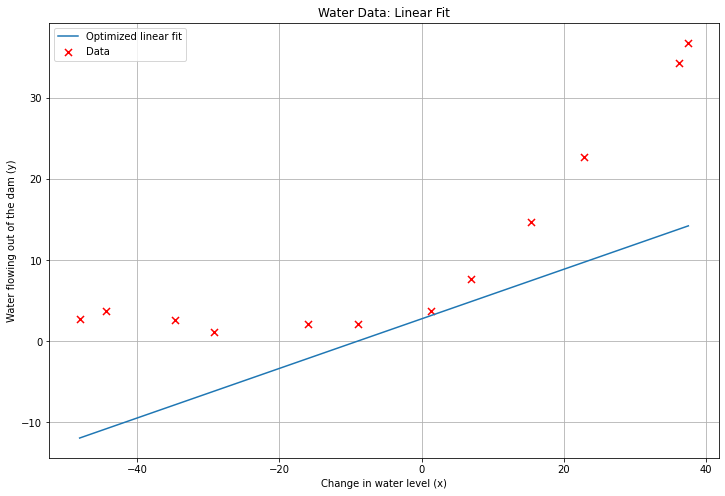

In [ ]:
plotData(X_train, y_train, theta)

Optimized theta: [13.0879157   0.36777795]


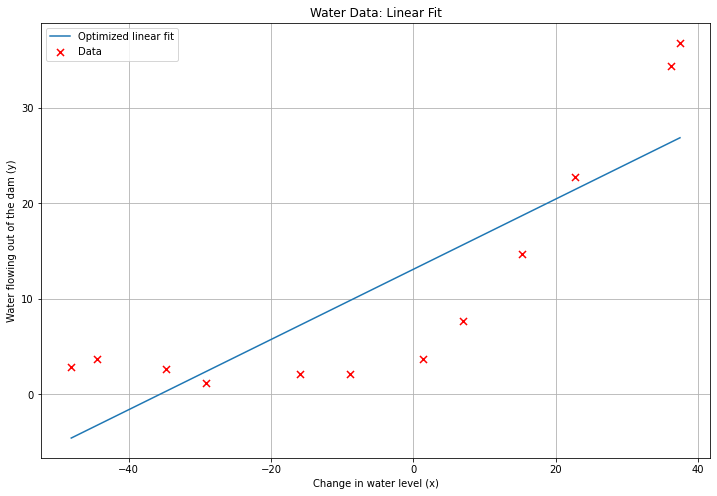

In [ ]:
from scipy.optimize import minimize
def optimalTheta(theta, X, y, reg = 0):
    #Nelder-Mead yields best fit
    res = minimize(fun = cost, x0 = theta, args = (X, y, reg), method = 'Nelder-Mead', jac = True)
    return res.x
initial_theta = np.ones((X_train.shape[1], 1))
opt_theta = optimalTheta(initial_theta, X_train, y_train)
print("Optimized theta: {0}".format(opt_theta))
plotData(X_train, y_train, opt_theta)

[[0.         0.36777906]]
[13.08792731]


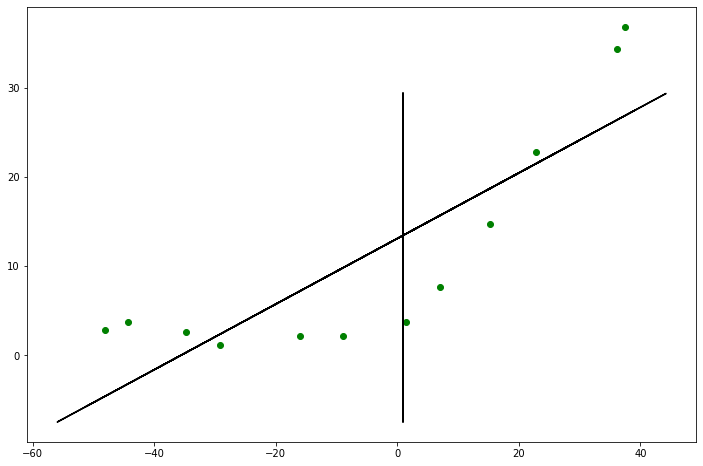

In [ ]:
reg = linear_model.LinearRegression().fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(X_test)
plt.scatter(X_train[:, 1], y_train, color='g')
plt.plot(X_test, y_pred, color='k')
plt.plot

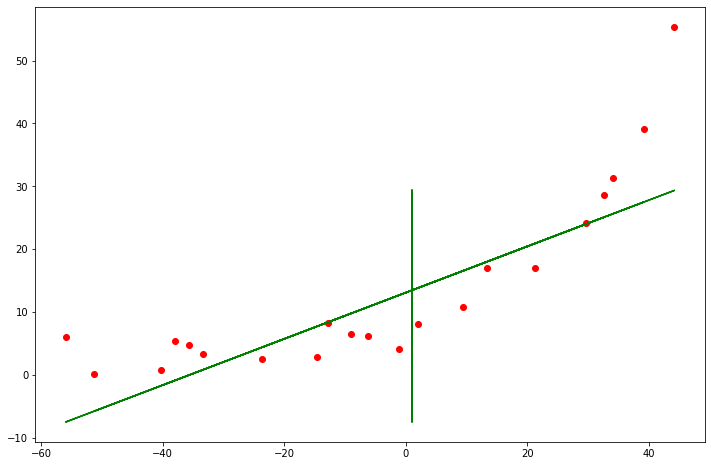

In [ ]:
plt.scatter(X_test[:, 1], y_test, color = "red")
plt.plot(X_test, y_pred, color = "green")
plt.show()

With the training data, we see that a degree 1 linear regression somewhat accurately models the data

0 342.37927707021424 342.37927707021424
1 130.07449765407753 212.3047794161367
2 128.89897708936707 1.1755205647104674
3 128.70139825584457 0.19757883352249905
4 128.5087229510839 0.1926753047606553
5 128.31644510369244 0.19227784739146614
6 128.1245431173974 0.19190198629505062
7 127.93301616126386 0.19152695613352932
8 127.74186350193256 0.19115265933130843
9 127.55108440792159 0.1907790940109635
10 127.3606781491808 0.19040625874079353
11 127.17064399708651 0.19003415209428454
12 126.98098122443915 0.18966277264736675
13 126.79168910546035 0.18929211897879838
14 126.60276691578991 0.18892218967043561
15 126.41421393248342 0.18855298330649362
16 126.2260294340092 0.18818449847421448
17 126.03821270024571 0.18781673376349772
18 125.85076301247864 0.18744968776707083
19 125.6636796533983 0.1870833590803329
20 125.47696190709694 0.18671774630136895
21 125.29060905906559 0.18635284803134766
22 125.10462039619192 0.1859886628736689
23 124.91899520675702 0.18562518943490147
24 124.73373278

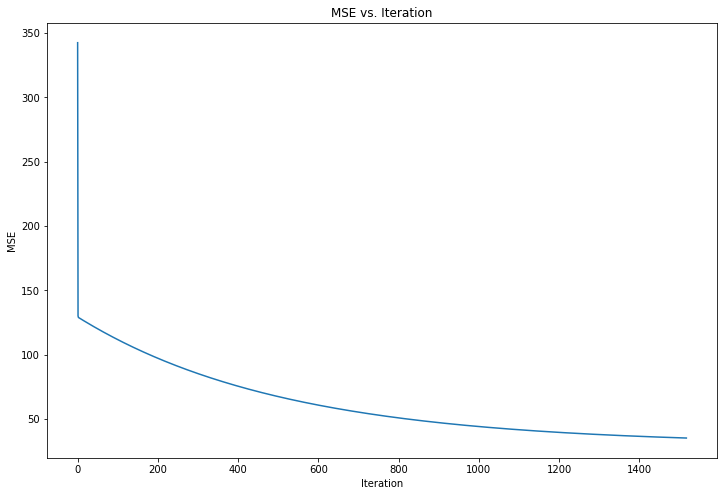

MSE:  35.22038886739669
alpha = 0.001


In [ ]:
alpha = 0.001 # learning rate
theta = gradient_descent(alpha, X_test, y_test, 10000)
print("alpha = 0.001")

The model generated with the Linear Regression built-in tool does not perform better than the one given at the beginning of the lab, as seen by the MSE

In [ ]:
length = len(X_train[:, 1])
t = np.zeros((length, length), dtype=float)
xN = []
print(xN)
mini = 0
maxi = 0
for i in range(0,12):
  t[:, i] = np.power(X_train[:, 1], i+1)
for j in range(0,12):
  xN.append(t[:, j]-min(t[:, j])/(max(t[:, j])-(min(t[:, j]))))
  print(xN[j])
opt_theta = optimalTheta(initial_theta, X_train, y_train)
print("Optimized theta: {0}".format(opt_theta))
plotData(X_train, y_train, opt_theta)

[]
[-15.37504385 -28.59124385  36.75125615  38.05395615 -47.49704385
  -8.37974385  15.86955615 -34.14454385   1.95095615 -43.82204385
   7.57525615  23.32445615]
[2.53980758e+02 8.49896573e+02 1.30967907e+03 1.40566422e+03
 2.30964742e+03 7.99495860e+01 2.34327905e+02 1.20452642e+03
 1.92904037e+00 1.96992087e+03 4.91883460e+01 5.18139675e+02]
[-4.04697581e+03 -2.47763811e+04  4.73973392e+04  5.27021537e+04
 -1.10998246e+05 -7.14198639e+02  3.58773556e+03 -4.18040064e+04
  3.35904604e+00 -8.74319328e+04  3.45666391e+02  1.17949551e+04]
[6.45066502e+04 7.22325606e+05 1.71526147e+06 1.97589426e+06
 5.33447507e+06 6.39207002e+03 5.49099588e+04 1.45088592e+06
 3.72442315e+00 3.88059151e+06 2.41957565e+03 2.68469589e+05]
[-1.02802881e+06 -2.10579576e+07  6.20744556e+07  7.40806237e+07
 -2.56368470e+08 -5.71539182e+04  8.40551443e+05 -5.03548812e+07
  5.94978796e+00 -1.72235397e+08  1.69704696e+04  6.11109350e+06]
[1.63835019e+07 6.13902661e+08 2.24644348e+09 2.77744553e+09
 1.23207611e+10 

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


ValueError: ignored

Here I was able to implement a function that creates higher order features and scales them with normalization. However, I was not able to continue past this point in the assignment, as I should've sought out help to finish it.